In [199]:
user_interest_team = print(input("Enter the team you're interested in highlighting against the 5 highest paying clubs and all other clubs in the MLB with OFFICIAL team abbreviation please. \n Example: Atlanta would be ATL"))
print(user_interest_team)

BOS
None


In [200]:
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statsmodels.formula.api as sm

#I had to copy the whole ass path and then was pulling my hair out any type of path mods from copy/paste edits. turns out I just needed an r

teams_df = pd.read_csv(r'\Users\nabrams\Documents\GitHub\Personal---Portfolio-Projects\BaseBall Stats\core\Teams.csv')
salaries_df = pd.read_csv(r'\Users\nabrams\Documents\GitHub\Personal---Portfolio-Projects\BaseBall Stats\contrib\Salaries.csv')

#print(teams_df.head(20), 'This is the initial database print')
#print(salaries_df.head(20), 'This is the initial salaries database print')


#filtering out for more modern baseball years. Adding Batting Average, On-base %, and slugging% as new columns calculating from old ones
teams_df = teams_df[teams_df['yearID'] >= 1985]
teams_df = teams_df[['yearID', 'teamID', 'Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]
teams_df['BA'] = teams_df['H']/teams_df['AB']
teams_df['OBP'] = (teams_df['H'] +teams_df['BB'] + teams_df['HBP']) / (teams_df['AB'] + teams_df['BB'] + teams_df['HBP'] + teams_df['SF'])
teams_df['SLG'] = (teams_df['H'] + teams_df['2B'] + (2*teams_df['3B']) + (3*teams_df['HR'])) / teams_df['AB']



#set a new index using the year and team abbreviation as the indices, then tesing if the indices work

#teams_df = teams_df.join(indexed_salaries)
#print(indexed_salaries[2016, 'ATL'])
#print(salaries_df.head(30))

#once yo index stuff, you just cant use yearID






#print(teams_df.columns.to_list())
#print(teams_df.index.to_list())
'''
df1 = teams_df[teams_df.index.get_level_values('yearID') > 2015]
#print(df1)

print('will this give me a table?')
res = teams_df.query('yearID > 2016')
print(res)
'''




#filter the database to account for more modern baseball
#print(teams_df.head(20), 'This is after filtering for more')

'''
print('\n')
print(teams_df['W'][2022, 'OAK'])
print(teams_df['W'][2022, 'ATL'])
'''

#print(teams_df.head(25))
#print(teams_df['salary'][2016, 'ATL'])







#print(teams_df.head(30))
#print("the slugging avg of the 108 Braves was: ", teams_df['SLG'][2018, 'ATL'])






"\nprint('\n')\nprint(teams_df['W'][2022, 'OAK'])\nprint(teams_df['W'][2022, 'ATL'])\n"

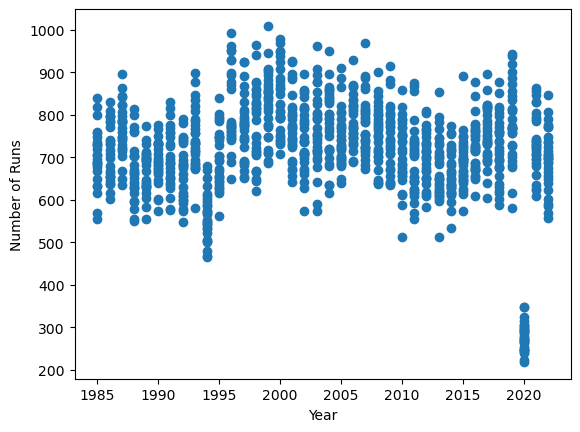

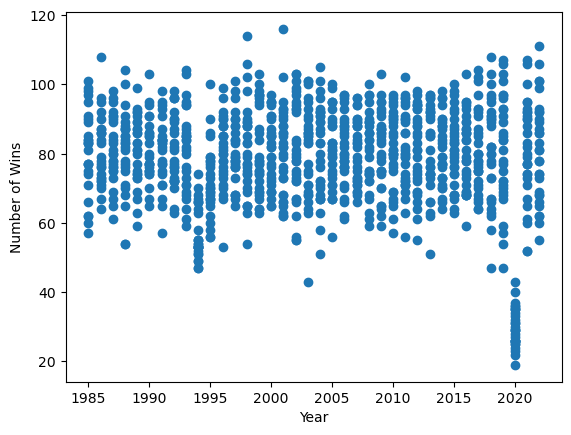

In [201]:
plt.scatter('yearID', 'R', data=teams_df)
plt.xlabel('Year')
plt.ylabel('Number of Runs')
plt.show()


plt.scatter('yearID', 'W',  data=teams_df)
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.show()


      yearID teamID  Rank    R   RA    G   W     H   BB   HBP    AB    SF  \
1917    1985    ATL     5  632  781  162  66  1359  553  22.0  5526  41.0   
1918    1985    BAL     4  818  764  161  83  1451  604  19.0  5517  40.0   
1919    1985    BOS     5  800  720  163  81  1615  562  30.0  5720  57.0   
1920    1985    CAL     2  732  703  162  90  1364  648  39.0  5442  35.0   
1921    1985    CHA     3  736  720  163  85  1386  471  43.0  5470  45.0   
...      ...    ...   ...  ...  ...  ...  ..   ...  ...   ...   ...   ...   
3010    2022    SLN     1  772  637  162  93  1386  537  80.0  5496  45.0   
3011    2022    TBA     1  666  614  162  86  1294  500  57.0  5412  31.0   
3012    2022    TEX     4  707  743  162  68  1308  456  47.0  5478  38.0   
3013    2022    TOR     2  775  679  162  92  1464  500  55.0  5555  33.0   
3014    2022    WAS     5  603  855  162  55  1351  442  60.0  5434  37.0   

       HR   2B  3B        BA       OBP       SLG  win_bin  
1917  126  213 

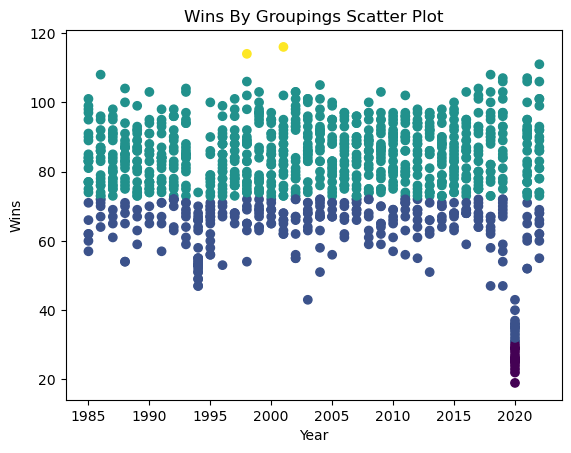

In [202]:
def win_bins(x):
    if x <= 30:
        return 1
    elif x >= 31 and x <= 72:
        return 2
    elif x >= 73 and x<= 113:
        return 3
    elif x <= 114 and x >= 130:
        return 4
    else:
        return 5

teams_df['win_bin'] = teams_df['W'].apply(win_bins)
print(teams_df)


plt.scatter(teams_df['yearID'], teams_df['W'], c=teams_df['win_bin'])
plt.title("Wins By Groupings Scatter Plot")
plt.xlabel("Year")
plt.ylabel('Wins')
plt.show()

In [203]:
teams_df = teams_df.set_index(['yearID', 'teamID'])
print('Testing to see if indicies work: ', teams_df['W'][2005, 'ATL'])
print('Above is the win total of the 2005 ATL Braves')




#finding out here that the maximum salary info I can get from these files is up to 2016
indexed_salaries = salaries_df.groupby(['yearID', 'teamID'])['salary'].sum()
indexed_salaries[2008, 'ATL']
teams_df = teams_df.join(indexed_salaries)
#print(teams_df['salary'][2005, 'ATL'])


#figuring out that .items is the way to grab a specific thign from a year if I've already set_indexed it
'''''
for i in teams_df.index:
    if teams_df.index:
        print (i, 'yes')
        '''

Testing to see if indicies work:  90
Above is the win total of the 2005 ATL Braves


"''\nfor i in teams_df.index:\n    if teams_df.index:\n        print (i, 'yes')\n        "

A scatter plot showing your team of interest's wins as a function of salary during a given year between 1985 and 2016.
 Team of Interest will be shown in pink.


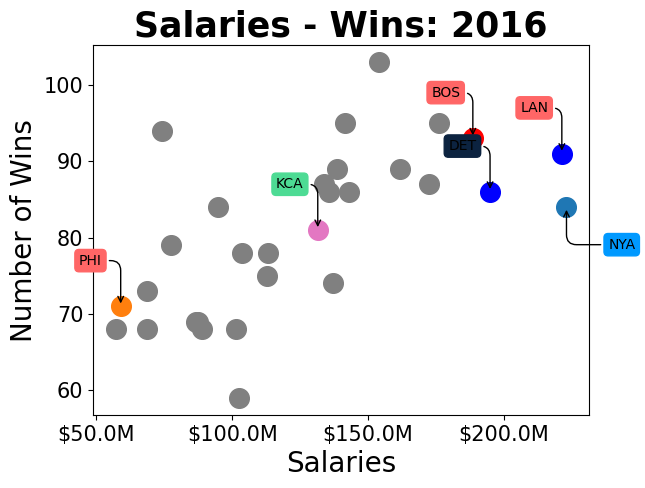

In [204]:

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

#making functions that plot a team the user is interested in looking at how their payroll correlated to offensive stats for a given year versus the top 5 spending 


def plot_spending_wins(teams, year, curious_team):
    print("A scatter plot showing your team of interest's wins as a function of salary during a given year between 1985 and 2016.\n Team of Interest will be shown in pink.")    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == curious_team:
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="tab:pink", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'NYA':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="tab:blue", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="red", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'LAN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="blue", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'PHI':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="tab:orange", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10")) 
        elif i == 'DET':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="blue", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#0C2340"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))             
        else:
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="grey", s=200)
    ax.xaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel('Salaries', fontsize=20)
    ax.set_ylabel('Number of Wins' , fontsize=20)
    ax.set_title('Salaries - Wins: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()


plot_spending_wins(teams_df, 2016, 'KCA')


Regression Model Summary for Runs to OBP+SLG+BA                             OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     296.4
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          8.40e-141
Time:                        18:10:14   Log-Likelihood:                -6435.6
No. Observations:                1098   AIC:                         1.288e+04
Df Residuals:                    1094   BIC:                         1.290e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

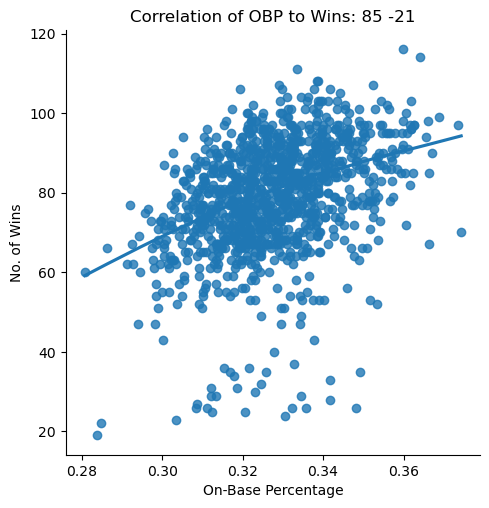

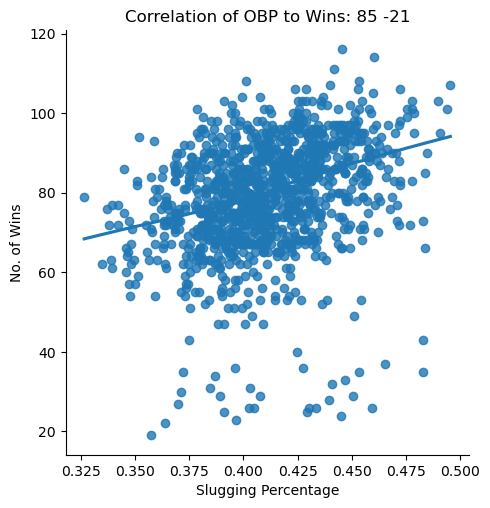

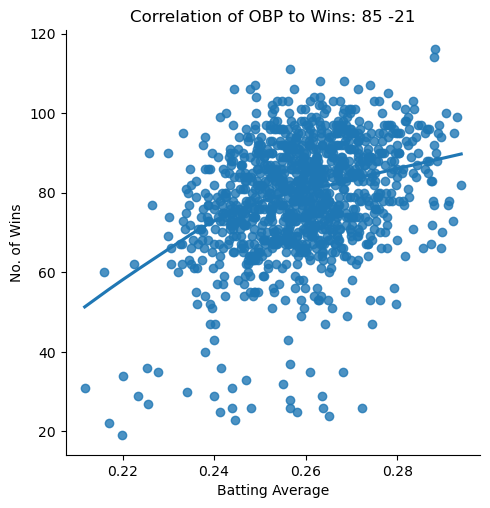

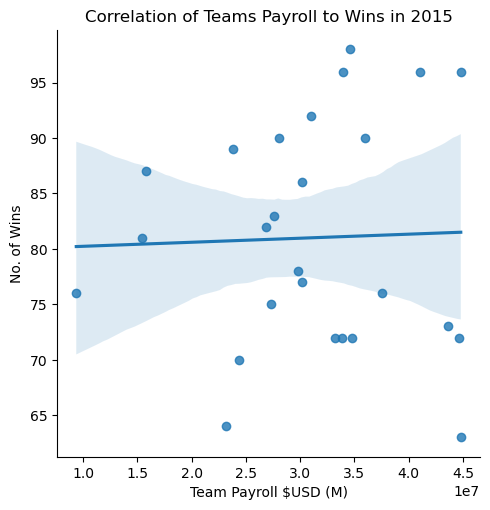

In [205]:
#Running some linear egression models based on on base% and slug% and batting avg
regression_model_one = sm.ols("R~OBP+SLG+BA", teams_df)
run_regression_model_one = regression_model_one.fit()

regression_model_two = sm.ols("R~OBP+SLG", teams_df)
run_regression_model_two = regression_model_two.fit()

regression_model_three = sm.ols("R~BA", teams_df)
run_regression_model_three = regression_model_three.fit()

print('Regression Model Summary for Runs to OBP+SLG+BA', run_regression_model_one.summary())
print('Regression Model Summary for Runs to OBP+SLG', run_regression_model_two.summary())
print('Regression Model Summary for Runs to BA', run_regression_model_three.summary())


def correlation(x,y):
    return ((x-x.mean())*(y-y.mean())).mean() / (x.std(ddof=0) * y.std(ddof=0))
    #print(correlation(teams_df['OBP'], teams_df['W']))

sns.lmplot(teams_df, x='OBP', y='W', lowess=True)
plt.title('Correlation of OBP to Wins: ''85 -''21')
plt.xlabel('On-Base Percentage')
plt.ylabel('No. of Wins')
print(correlation(teams_df['OBP'], teams_df['W']))

sns.lmplot(teams_df, x='SLG', y='W', lowess=True)
plt.title('Correlation of OBP to Wins: ''85 -''21')
plt.xlabel('Slugging Percentage')
plt.ylabel('No. of Wins')
print(correlation(teams_df['SLG'], teams_df['W']))


#print(teams_df.head())



sns.lmplot(teams_df, x='BA', y='W', lowess=True)
plt.title('Correlation of OBP to Wins: ''85 -''21')
plt.xlabel('Batting Average')
plt.ylabel('No. of Wins')
print(correlation(teams_df['BA'], teams_df['W']))

def salary_by_wins_by_year():
    year = input("Enter year between 1985-2021 you are interested in examining team wins as a function of team payroll: ")
    year = int(year)
    sns.lmplot(teams_df.loc[year], x='salary', y='W')
    plt.title('Correlation of Teams Payroll to Wins in 2015')
    plt.xlabel("Team Payroll $USD (M)")
    plt.ylabel("No. of Wins")
    print(correlation(teams_df['salary'], teams_df['W']))

salary_by_wins_by_year()
